In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from IPython.display import Image  
import pydotplus
import graphviz

#產生資料
def generataData(attributes,data,prob,num):
    temp = []
    for i in range(num):
        dic = {}
        for label in attributes:
            value = np.random.choice(data.get(label), p=prob.get(label))
            dic.update({label:value})
        conf = god(attributes,dic)
        dic.update({"pass":conf})
        temp.append(dic)
    return temp


def work(labtime,gametime):
    if 16 - labtime-gametime > 4:
        return True
    else:
        return False

def check(labtime,gametime,course,social):
    A = 0
    B = 0
    C = 0
    if labtime > 8:
        A +=1
    elif labtime >4:
        B +=1
    else:
        C +=1

    if gametime <= 2:
        A +=1
    elif gametime <=5:
        B +=1
    else:
        C +=1

    if course < 4:
        A +=1
    elif course < 6:
        B +=1
    else:
        C +=1

    if social < 4:
        A +=1
    elif social < 6:
        B +=1
    else:
        C +=1
    
    return {"A":A,"B":B,"C":C}

def god(attributes,dic):
    confidence = "X"
    prof = dic["prof"]
    score = dic["score"]
    course = dic["course"]
    labtime = dic["lab"]
    gametime = dic["games"]
    social = dic["social"]
    
    if dic["partTime"] == "Y":
        social += 2
    if dic["weekend"] == "Y" and work(labtime,gametime):
        labtime *= 1.3
    
    if dic["papper"] == "Hard":
        course += 3
    elif dic["papper"] == "Normal":
        course += 2
    else:
        course += 1
        
    dicccc = check(labtime,gametime,course,social)
    A = dicccc.get("A")
    B = dicccc.get("B")
    C = dicccc.get("C")

    if prof == "A":
        if score == "A":
            confidence = "A" if A > 0 or A+B >1 else "B"
        elif score == "B":
            confidence = "A" if A > 0 and B > 0 else "B"
        elif score == "C":          
            confidence = "B" if A > 0 or A+B >1 else "C"
        else:
            confidence = "D" if C > 1 else "C"
    elif prob == "B":
        if score == "A":
            if A+B >2:
                confidence = "A" if A > 0 else "B"
            else:
                confidence = "C"
        elif score == "B":
            if A+B >3:
                confidence = "A" if A > 0 else "B"
            else:
                confidence = "C"
        elif score == "C":
            if A+B >3:
                confidence = "B"
            elif C >2:
                confidence = "D"
            else:
                confidence = "C"
        else:
            confidence = "D" if A+B < 2 else "C"

    else:
        if score == "A":
            confidence = "B" if  labtime > 8 and gametime < 5 else "C"
        elif score == "B":
            confidence = "B" if labtime > 8 and gametime < 5 and course < 4 else "C"
        elif score == "C":
            confidence = "C" if labtime > 8 and ( gametime < 5 or course < 4 )  else "D"
        else:
            confidence = "D"

    return confidence    
    



In [2]:
attributes = ["weekend","social","games","lab","prof","papper","course","score","partTime"]

data = {}
data["lab"] = list(range(0, 13))
data["games"]  = list(range(0, 13))
data["course"]  = list(range(0, 6))
data["score"]  = ["D" ,"C" ,"B" ,"A"]
data["partTime"]  = ["Y", "N"]
data["prof"]  = ["A", "B", "C"]
data["papper"]  = ["Hard","Normal", "Easy"]
data["weekend"]  = ["Y", "N"]
data["social"]  = list(range(0, 6))

prob = {}
prob["lab"] =[0.01, 0.02, 0.03, 0.04, 0.1, 0.15, 0.2, 0.2, 0.15 , 0.04, 0.03, 0.02, 0.01]
prob["games"]  = [0.05, 0.1, 0.15, 0.15, 0.2, 0.15, 0.1, 0.05, 0.02]+([0.01] * 2)+([0.005] * 2)
prob["course"]  = [0.22, 0.25, 0.3, 0.16, 0.05, 0.02]
prob["score"]  = [0.1 ,0.50 ,0.35 ,0.05]
prob["partTime"]  =[0.3, 0.7]
prob["prof"]  = [0.3, 0.40, 0.3]
prob["papper"]  = [0.2, 0.65, 0.15]
prob["weekend"]  = [0.2 , 0.8]
prob["social"]  = [0.1 , 0.25 ,0.25 ,0.25 , 0.1, 0.05]



data = generataData(attributes,data,prob,5000)
df = pd.DataFrame(data)
df.to_csv("data.csv", index=False)

In [3]:
df = pd.read_csv("data.csv")
inputData = df.drop(["pass"], axis=1, inplace=False) 
inputData = pd.get_dummies(inputData, drop_first=True)
label = df["pass"]
#print(inputData.head())

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputData, label, test_size=0.3)

clf=tree.DecisionTreeClassifier(max_depth=3)


clf=clf.fit(X_train,y_train)  #把训练数据集放入到分类器中，fit来寻找相应标签
pred_label = clf.predict(X_test)
accuracy_score(y_test, pred_label)

0.8626666666666667

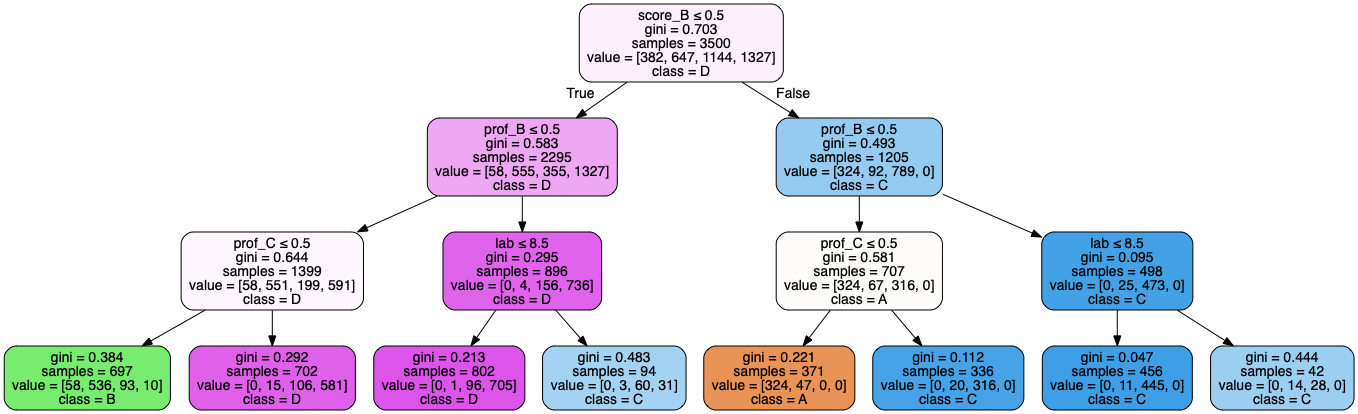

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(inputData.columns.values),  
                         class_names=["A","B","C","D"],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
#graph = graphviz.Source(dot_data)
#graph

In [6]:
from sklearn import svm 
clf = svm.SVC(kernel = 'linear') #SVM模組，svc,線性核函式 
clf.fit(X_train,y_train)
pred_label = clf.predict(X_test)
accuracy_score(y_test, pred_label)

0.9446666666666667